In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

## Вспомогательные методы

Заполнение матрицы рандомными числами

In [128]:
def fill_matrix_random(x, y, k):
    matrix = np.zeros((len(x), k))
    for i in range(len(x)):
        matrix[i] = np.random.uniform(0, 1, k)
    return matrix

Рассчет расстояния между 2 точками

In [129]:
def dist(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

Заполнение матрицы

In [130]:
def fill_matrix(k, x, y, x_c, y_c, m):
    new_matrix = np.zeros((len(x), k))
    for i in range(len(x)):
        for j in range(k):
            cl_d = dist(x[i], y[i], x_c[j], y_c[j])
            sum_dist = 0
            for l in range(k):
                lcl_dist = dist(x[i], y[i], x_c[l], y_c[l])
                sum_dist += (cl_d / lcl_dist)**(2 / (m - 1))
            new_matrix[i, j] = 1 / sum_dist
    return new_matrix

Отрисовка графика

In [131]:
def draw_clusters(df, x_column, y_column, cluster_column, x_c, y_c, title=''):
    facet = sns.lmplot(data=df, x=x_column, y=y_column, hue=cluster_column, 
                   fit_reg=False, legend=True, legend_out=True)
    plt.scatter(x_c, y_c, c='darkmagenta', s=150, marker='X')
    plt.title(title)

Инициализация центров кластеров

In [132]:
def create_centers(x, y, k):
    x_cc = np.mean(x)
    y_cc = np.mean(y)
    R = max(dist(x[i], y[i], x_cc, y_cc) for i in range(n))
    x_c, y_c = [], []
    for i in range(k):
        x_c.append(R * np.cos(2 * np.pi * i / k) + x_cc)
        y_c.append(R * np.sin(2 * np.pi * i / k) + y_cc)
    return x_c, y_c

Пересчет центров кластеров

In [133]:
def recal_c(x, y, matrix, k, m):
    x_c, y_c = [], []
    for i in range(k):
        s = sum(matrix[j, i]**m for j in range(len(x)) if matrix[j, i] == max(p for p in matrix[j]))
        c_x = sum(matrix[j, i]**m * x[j] for j in range(len(x)) if matrix[j, i] == max(p for p in matrix[j]))
        c_y = sum(matrix[j, i]**m * y[j] for j in range(len(x)) if matrix[j, i] == max(p for p in matrix[j]))
        x_c.append(c_x / s) if s != 0 else 0
        y_c.append(c_y / s) if s != 0 else 0
    return x_c, y_c

Условие окончания алгоритма

In [134]:
def can_stop(matrix_old, matrix, k, a):
    max_diff = 0
    for i in range(len(matrix)):
        for j in range(k):
            diff = np.abs(matrix[i, j] - matrix_old[i, j])
            if diff > max_diff:
                max_diff = diff
    return max_diff < a

Распределение точек по кластерам для графика

In [135]:
def get_clusters(matrix):
    clusters = []
    n = matrix.shape[0]
    k = matrix.shape[1]
    for i in range(n):
        max_v = max(matrix[i])
        clusters.append([j for j in range(k) if matrix[i][j] == max_v][0])
    return clusters

## Основные методы

Алгоритм c-means

In [136]:
def c_means(k, x, y, m, a, sh_grph):
    n = len(x)
    matrix = fill_matrix_random(x, y, k)
    while True:
        x_c, y_c = recal_c(x, y, matrix, k, m)
        matrix_new = fill_matrix(k, x, y, x_c, y_c, m)
        if can_stop(matrix_new, matrix, k, a):
            df = pd.DataFrame()
            df['x'] = x
            df['y'] = y
            df['cluster'] = get_clusters(matrix_new)
            draw_clusters(df, 'x', 'y', 'cluster', x_c, y_c, '')
            break
        matrix = matrix_new
    return x_c, y_c, matrix_new

Алгоритм c-means с инициализацией начальных точек кластеров

In [139]:
def c_means2(k, x, y, m, a, sh_grph):
    n = len(x)
    x_c, y_c = create_centers(x, y, k)
    matrix = fill_matrix_random(x, y, k)
    while True:
        matrix_new = fill_matrix(k, x, y, x_c, y_c, m)
        if can_stop(matrix_new, matrix, k, a):
            df = pd.DataFrame()
            df['x'] = x
            df['y'] = y
            df['cluster'] = get_clusters(matrix_new)
            draw_clusters(df, 'x', 'y', 'cluster', x_c, y_c, '')
            break
        matrix = matrix_new
        x_c, y_c = recal_c(x, y, matrix, k, m)
    return x_c, y_c, matrix_new

## Пример

In [127]:
n, k = 100, 4
m, a = 1.5, 0.1

x = np.random.randint(1, 100, n)
y = np.random.randint(1, 100, n)

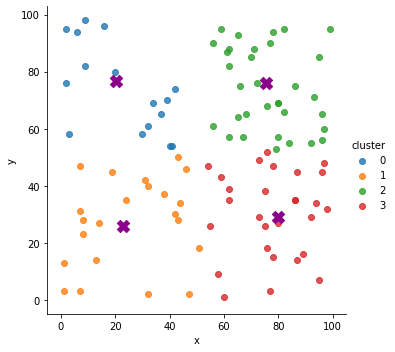

In [138]:
x_c, y_c, matrix_new = c_means(k, x, y, m, a, True)

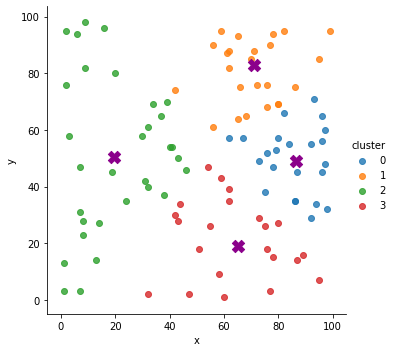

In [140]:
x_c, y_c, matrix_new = c_means2(k, x, y, m, a, True)